In [1]:
from tqdm import tqdm
import pandas as pd
from pathlib import Path
import os


In [2]:
if Path.cwd().name != 'src':
    os.chdir('/home/vaschetti/maxarSrc/src')
from my_functions import build

In [3]:
config = build.SegmentConfig(batch_size = 4, device='cpu')

/home/vaschetti/.pyenv/versions/3.10.13/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased
- GD model device: cpu
- Efficient SAM device: cpu


In [4]:
for i, event_name in enumerate(build.get_all_events()):
    print(f'{i} - {event_name}')

0 - southafrica-flooding22
1 - Kalehe-DRC-Flooding-5-8-23
2 - shovi-georgia-landslide-8Aug23
3 - Emilia-Romagna-Italy-flooding-may23
4 - src
5 - NWT-Canada-Aug-23
6 - Libya-Floods-Sept-2023
7 - Gambia-flooding-8-11-2022
8 - New-Zealand-Flooding23
9 - Hurricane-Fiona-9-19-2022
10 - Hurricane-Idalia-Florida-Aug23
11 - Hurricane-Ian-9-26-2022
12 - yellowstone-flooding22
13 - pakistan-flooding22
14 - Morocco-Earthquake-Sept-2023
15 - Indonesia-Earthquake22
16 - cyclone-emnati22
17 - Kahramanmaras-turkey-earthquake-23
18 - test_folder
19 - Marshall-Fire-21-Update
20 - metadata
21 - India-Floods-Oct-2023
22 - Maui-Hawaii-fires-Aug-23
23 - tonga-volcano21
24 - BayofBengal-Cyclone-Mocha-May-23
25 - Sudan-flooding-8-22-2022


In [5]:
all_events = build.get_all_events()

In [31]:
ix = 25
all_events[ix]

'Sudan-flooding-8-22-2022'

In [32]:
event_build_num = 0
event_road_num = 0
evento = build.Event(all_events[ix], seg_config = config, when='pre')

In [33]:
evento.set_all_mos_road_gdf()

not USA AfricaEast-Full.tsv


In [15]:
region_name = 'USA.tsv'
roads_root = '/mnt/data2/vaschetti_data/MS_roads'
roads_root = Path(roads_root)
region_road_df = pd.read_csv(roads_root/region_name, names =['geometry'], sep = '\t')

In [16]:
region_road_df = region_road_df.head(10000)

In [ ]:
region_road_df

,geometry
0,"{""type"":""Feature"",""geometry"":{""type"":""LineStri..."
1,"{""type"":""Feature"",""geometry"":{""type"":""LineStri..."
2,"{""type"":""Feature"",""geometry"":{""type"":""LineStri..."
3,"{""type"":""Feature"",""geometry"":{""type"":""LineStri..."
4,"{""type"":""Feature"",""geometry"":{""type"":""LineStri..."
...,...
54484732,"{""type"":""Feature"",""geometry"":{""type"":""LineStri..."
54484733,"{""type"":""Feature"",""geometry"":{""type"":""LineStri..."
54484734,"{""type"":""Feature"",""geometry"":{""type"":""LineStri..."
54484735,"{""type"":""Feature"",""geometry"":{""type"":""LineStri..."


In [17]:
from shapely import geometry
import json

In [18]:
def to_json(s):
    return json.loads(s)['geometry']
region_road_df['geometry'] = region_road_df['geometry'].apply(to_json)

In [19]:
def to_shape(s):
    try:
        return geometry.shape(s)
    except Exception as e:
        print(e)
        return geometry.LineString()
region_road_df['geometry'] = region_road_df['geometry'].apply(to_shape)

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point array must contain 0 or >1 elements

IllegalArgumentException: point ar

In [20]:
region_road_df.isna().sum()

geometry    0
dtype: int64

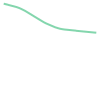

In [39]:
region_road_df.iloc[2134].values[0]

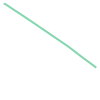

In [29]:
geometry.shape(region_road_df['geometry'].iloc[0])

In [30]:
from shapely import geometry
import json
def custom_json_loads(s):
    try:
        return geometry.shape(json.loads(s)['geometry'])
    except:
        return None
region_road_df['geometry'] = region_road_df['geometry'].apply(custom_json_loads)

TypeError: the JSON object must be str, bytes or bytearray, not dict

In [34]:
evento.set_build_gdf_all_mos()

Found 4 links matching: [122320001, 122320003, 1223200, 12232000]
Found 0 links matching: [122312013, 12231201, 1223120]
No buildings for this region


AttributeError: You are calling a geospatial method on the GeoDataFrame, but the active geometry column to use has not been set. 
There are no existing columns with geometry data type. You can add a geometry column as the active geometry column with df.set_geometry. 

In [ ]:
evento.name

'Marshall-Fire-21-Update'

In [ ]:
for _, mos in evento.mosaics.items():
    event_build_num += mos.build_num
    event_road_num += mos.road_num

In [ ]:
event_build_num

292124

In [ ]:
event_road_num

19266